In [1]:
%reset -f

In [2]:
import numpy             as np
import statsmodels.api   as sm
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

from statsmodels.iolib.summary2 import summary_col

## set up seaborn parameters for plotting

In [3]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(16, 6))

In [4]:
df = pd.read_csv("TRAFFIC2.csv")

In [5]:
df = sm.add_constant(df)
df.columns

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Index(['const', 'year', 'totacc', 'fatacc', 'injacc', 'pdoacc', 'ntotacc',
       'nfatacc', 'ninjacc', 'npdoacc', 'rtotacc', 'rfatacc', 'rinjacc',
       'rpdoacc', 'ushigh', 'cntyrds', 'strtes', 't', 'tsq', 'unem', 'spdlaw',
       'beltlaw', 'wkends', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug',
       'sep', 'oct', 'nov', 'dec', 'ltotacc', 'lfatacc', 'prcfat', 'prcrfat',
       'lrtotacc', 'lrfatacc', 'lntotacc', 'lnfatacc', 'prcnfat', 'lushigh',
       'lcntyrds', 'lstrtes', 'spdt', 'beltt', 'prcfat_1'],
      dtype='object')

In [6]:
df.head()

,const,year,totacc,fatacc,injacc,pdoacc,ntotacc,nfatacc,ninjacc,npdoacc,...,lrfatacc,lntotacc,lnfatacc,prcnfat,lushigh,lcntyrds,lstrtes,spdt,beltt,prcfat_1
0,1.0,1981,40511,365,15626,24520,38235,323,14743,23169,...,2.484907,10.551507,5.777652,0.844776,6.963190,8.830251,8.153062,0,0,NaN
1,1.0,1981,36034,329,14469,21236,33989,294,13620,20075,...,2.079442,10.433792,5.683580,0.864986,6.839477,8.708970,8.046550,0,0,0.900990
2,1.0,1981,40328,369,16026,23933,37990,335,15105,22550,...,2.484907,10.545078,5.814130,0.881811,7.041412,8.825119,8.148446,0,0,0.913027
3,1.0,1981,37699,369,15560,21770,35457,326,14654,20477,...,2.639057,10.476076,5.786897,0.919424,6.916715,8.750524,8.071531,0,0,0.914997
4,1.0,1981,38816,355,16546,21915,36611,321,15569,20721,...,1.791759,10.508104,5.771441,0.876786,6.986567,8.816705,8.111928,0,0,0.978806


In [7]:
df.describe()

,const,year,totacc,fatacc,injacc,pdoacc,ntotacc,nfatacc,ninjacc,npdoacc,...,lrfatacc,lntotacc,lnfatacc,prcnfat,lushigh,lcntyrds,lstrtes,spdt,beltt,prcfat_1
count,108.0,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,...,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,107.000000
mean,1.0,1985.000000,42831.259259,377.935185,17861.481481,24591.842593,39522.972222,335.305556,16578.777778,22608.888889,...,2.499360,10.580020,5.807501,0.851227,7.083780,8.798209,8.196217,27.407407,37.555556,0.886101
std,0.0,2.594026,4608.328416,48.546783,1963.107290,2773.219318,3797.031756,41.129715,1695.411153,2252.885607,...,0.425848,0.096837,0.123975,0.097085,0.117027,0.076376,0.086376,42.733916,43.192534,0.100130
min,1.0,1981.000000,32699.000000,266.000000,13268.000000,19162.000000,30759.000000,237.000000,12492.000000,18030.000000,...,1.098612,10.333938,5.468060,0.672980,6.817831,8.581857,7.946618,0.000000,0.000000,0.701684
25%,1.0,1983.000000,38846.750000,345.000000,16302.250000,22010.000000,36273.750000,305.750000,15301.250000,20582.500000,...,2.302585,10.498849,5.722767,0.780216,7.006684,8.748781,8.133074,0.000000,0.000000,0.822797
50%,1.0,1985.000000,42863.500000,370.000000,17770.500000,24878.000000,39541.000000,333.000000,16489.500000,22926.500000,...,2.564949,10.585093,5.808143,0.844329,7.079185,8.802822,8.190350,0.000000,0.000000,0.878849
75%,1.0,1987.000000,46868.500000,405.000000,19613.000000,26720.250000,42644.750000,363.000000,18072.250000,24187.000000,...,2.772589,10.660659,5.894403,0.905300,7.165297,8.846960,8.268152,81.250000,81.250000,0.946467
max,1.0,1989.000000,52971.000000,500.000000,21741.000000,31425.000000,47874.000000,434.000000,19963.000000,28338.000000,...,3.433987,10.776328,6.073044,1.181720,7.328437,8.962520,8.399985,108.000000,108.000000,1.216829


# (a) 
## at which observation the variable $\mathrm{beltlaw}$ turns from $0$ to $1$

<AxesSubplot:xlabel='t', ylabel='beltlaw'>

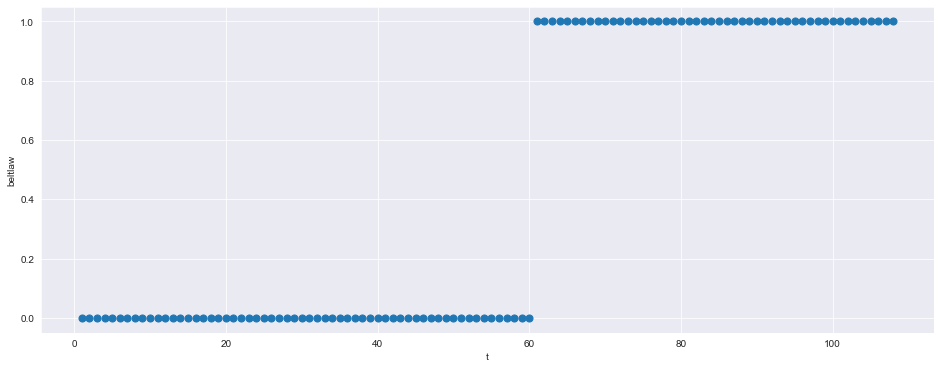

In [8]:
df.plot.scatter(x = 't', y = 'beltlaw', s=50)

In [9]:
df[['beltlaw']][55:65]

,beltlaw
55,0
56,0
57,0
58,0
59,0
60,1
61,1
62,1
63,1
64,1


In [10]:
df[['year','feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec', 'beltlaw']][59:62]

,year,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,beltlaw
59,1985,0,0,0,0,0,0,0,0,0,0,1,0
60,1986,0,0,0,0,0,0,0,0,0,0,0,1
61,1986,1,0,0,0,0,0,0,0,0,0,0,1


## at which observation the variable $\mathrm{spdlaw}$ turns from $0$ to $1$

<AxesSubplot:xlabel='t', ylabel='spdlaw'>

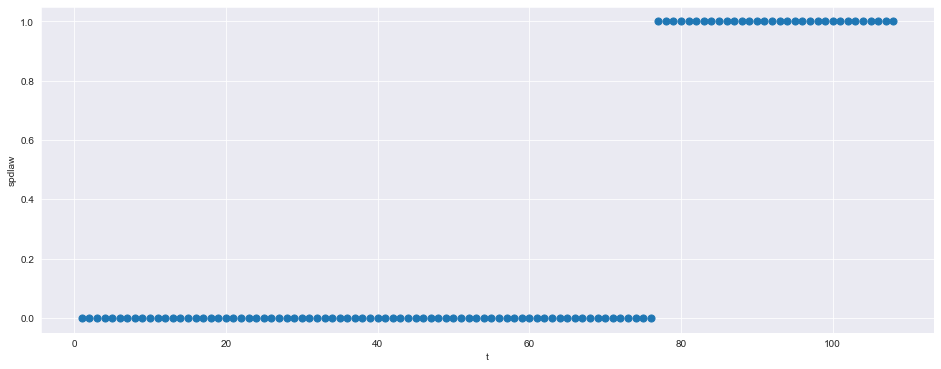

In [11]:
df.plot.scatter(x = 't', y = 'spdlaw', s=50)

In [12]:
df[['spdlaw']][65:80]

,spdlaw
65,0
66,0
67,0
68,0
69,0
70,0
71,0
72,0
73,0
74,0


In [13]:
df[['year','feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec', 'spdlaw']][74:77]

,year,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,spdlaw
74,1987,0,1,0,0,0,0,0,0,0,0,0,0
75,1987,0,0,1,0,0,0,0,0,0,0,0,0
76,1987,0,0,0,1,0,0,0,0,0,0,0,1


# (b)

In [14]:
X_b   = df[['const', 't', 'feb', 'mar', 'apr', 'may', 'jun', 
            'jul', 'aug','sep', 'oct', 'nov', 'dec']]
Y_b   = df[['ltotacc']]
M_OLS = sm.OLS(Y_b, X_b, missing='drop')

OLS_result = M_OLS.fit()
print(OLS_result.summary())

                            OLS Regression Results                            
Dep. Variable:                ltotacc   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     31.06
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           1.18e-27
Time:                        12:42:01   Log-Likelihood:                 173.28
No. Observations:                 108   AIC:                            -320.6
Df Residuals:                      95   BIC:                            -285.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4686      0.019    550.895      0.0

# (c)

In [15]:
X_c   = df[['const', 't', 'feb', 'mar', 'apr', 'may', 'jun', 
            'jul', 'aug','sep', 'oct', 'nov', 'dec',
            'wkends', 'unem', 'spdlaw', 'beltlaw']]
Y_c   = df[['ltotacc']]
M_OLS = sm.OLS(Y_c, X_c, missing='drop')

OLS_result = M_OLS.fit()
print(OLS_result.summary())

                            OLS Regression Results                            
Dep. Variable:                ltotacc   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     57.61
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           1.83e-40
Time:                        12:42:01   Log-Likelihood:                 217.32
No. Observations:                 108   AIC:                            -400.6
Df Residuals:                      91   BIC:                            -355.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6399      0.063    168.657      0.0

# (e)

In [16]:
df[['prcfat']].describe()

,prcfat
count,108.000000
mean,0.885636
std,0.099778
min,0.701684
25%,0.822868
50%,0.878098
75%,0.946348
max,1.216829


# (f)

In [17]:
X_f   = df[['const', 't', 'feb', 'mar', 'apr', 'may', 'jun', 
            'jul', 'aug','sep', 'oct', 'nov', 'dec',
            'wkends', 'unem', 'spdlaw', 'beltlaw']]
Y_f   = df[['prcfat']]
M_OLS = sm.OLS(Y_f, X_f, missing='drop')

OLS_result = M_OLS.fit()
print(OLS_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 prcfat   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     14.44
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           1.59e-18
Time:                        12:42:01   Log-Likelihood:                 164.42
No. Observations:                 108   AIC:                            -294.8
Df Residuals:                      91   BIC:                            -249.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0298      0.103     10.003      0.0

# (g)

In [18]:
from statsmodels.tsa.stattools     import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## set time index

In [19]:
df['time'] = df['t']
df = df.set_index('time')
df.head()

,const,year,totacc,fatacc,injacc,pdoacc,ntotacc,nfatacc,ninjacc,npdoacc,...,lrfatacc,lntotacc,lnfatacc,prcnfat,lushigh,lcntyrds,lstrtes,spdt,beltt,prcfat_1
time,,,,,,,,,,,,,,,,,,,,,
1,1.0,1981,40511,365,15626,24520,38235,323,14743,23169,...,2.484907,10.551507,5.777652,0.844776,6.963190,8.830251,8.153062,0,0,NaN
2,1.0,1981,36034,329,14469,21236,33989,294,13620,20075,...,2.079442,10.433792,5.683580,0.864986,6.839477,8.708970,8.046550,0,0,0.900990
3,1.0,1981,40328,369,16026,23933,37990,335,15105,22550,...,2.484907,10.545078,5.814130,0.881811,7.041412,8.825119,8.148446,0,0,0.913027
4,1.0,1981,37699,369,15560,21770,35457,326,14654,20477,...,2.639057,10.476076,5.786897,0.919424,6.916715,8.750524,8.071531,0,0,0.914997
5,1.0,1981,38816,355,16546,21915,36611,321,15569,20721,...,1.791759,10.508104,5.771441,0.876786,6.986567,8.816705,8.111928,0,0,0.978806


<AxesSubplot:xlabel='time'>

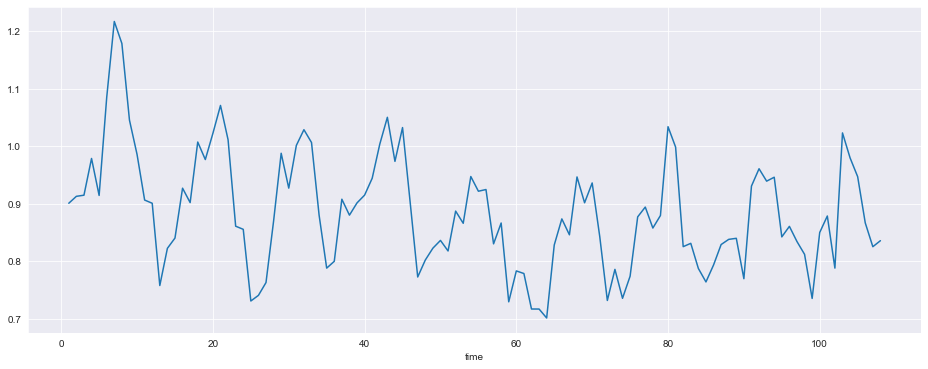

In [20]:
df['prcfat'].plot()

## compute the ac and pac

In [21]:
print("the acf of prcfat", acf(df['prcfat']))
print()
print("the pacf of prcfat", pacf(df['prcfat']))

the acf of prcfat [ 1.          0.7077258   0.44390511  0.18020643 -0.05593569 -0.22987723
 -0.30641628 -0.25670983 -0.09145165  0.08903988  0.30972437  0.47007627
  0.5382829   0.43942269  0.26763836  0.09382853 -0.10409557 -0.25905733
 -0.36460658 -0.34798209 -0.18803081  0.0139571   0.18383124  0.34686263
  0.37100008  0.33985822  0.19186888  0.04099565 -0.11236437 -0.23334627
 -0.25400971 -0.20730165 -0.12518452  0.02213073  0.15895365  0.28050004
  0.33120027  0.30015236  0.20824572  0.0361951  -0.13010219]

the pacf of prcfat [ 1.          0.71434006 -0.11843756 -0.18926711 -0.17536958 -0.12347185
 -0.03075713  0.10291886  0.20664096  0.12004668  0.25440263  0.1774409
  0.13400809 -0.10627431 -0.0727345   0.02005764 -0.10207449 -0.08198443
 -0.19810874 -0.07480504  0.12023744  0.13127989 -0.00773296  0.13614667
 -0.08742183  0.07086637 -0.10967492  0.01878168  0.00539724  0.03396158
  0.1958979   0.03210107 -0.10408789  0.01337504  0.07021146  0.07136984
  0.07487466 -0.03674245 

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


In [22]:
print("the acf of unem", acf(df['unem']))
print()
print("the pacf of unem", pacf(df['unem']))

the acf of unem [ 1.00000000e+00  9.40967716e-01  8.92843254e-01  8.60085727e-01
  8.36602869e-01  8.16674221e-01  7.99083263e-01  7.53058615e-01
  7.07702563e-01  6.67333534e-01  6.38368134e-01  6.29499350e-01
  6.13137330e-01  5.52737047e-01  4.83590287e-01  4.38765672e-01
  4.04060656e-01  3.82188284e-01  3.60580279e-01  3.23313427e-01
  2.79163632e-01  2.40230655e-01  2.28043397e-01  2.31870352e-01
  2.30943041e-01  1.91198611e-01  1.47897263e-01  1.25884195e-01
  1.13142280e-01  9.65213028e-02  9.04014717e-02  5.66018823e-02
  2.30653085e-02 -6.74907110e-04 -1.18155090e-02 -1.69428698e-03
  2.27334269e-03 -2.77333178e-02 -5.82363137e-02 -7.50628035e-02
 -8.90336467e-02]

the pacf of unem [ 1.          0.94976181  0.07801601  0.14359301  0.11598492  0.07982486
  0.07070973 -0.28573976 -0.07747885 -0.07668814  0.03841144  0.23894735
 -0.01114131 -0.44041313 -0.36891183  0.06163387  0.11236061  0.17678398
  0.12207068  0.02944005 -0.06147472 -0.1684314   0.25940782  0.25177189
  0.20

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


## plot the ac and pac

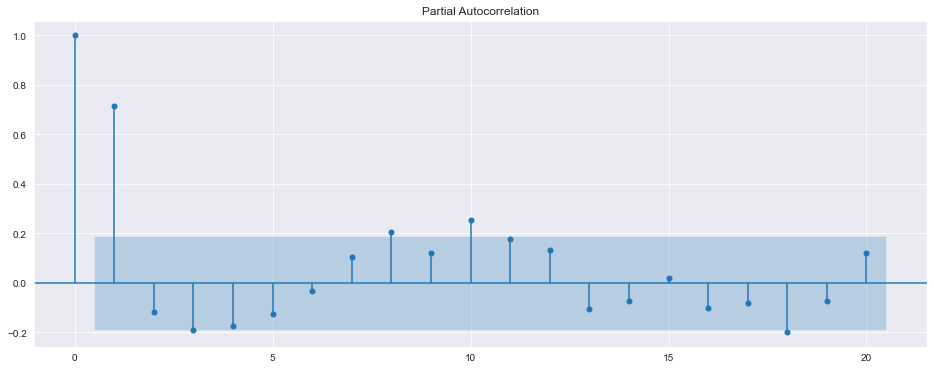

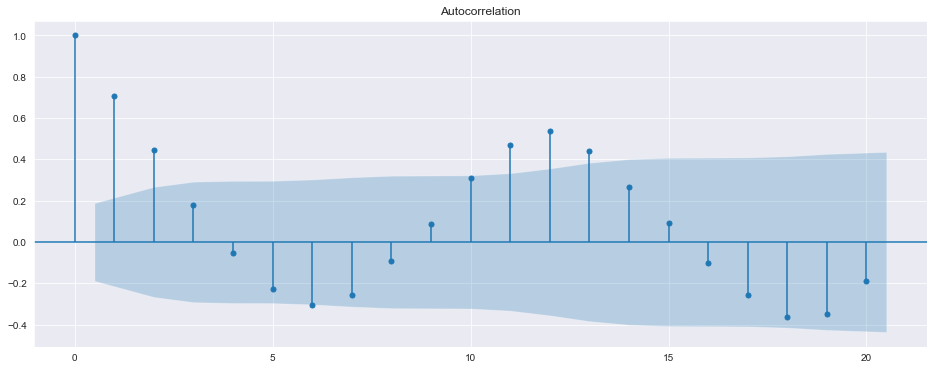

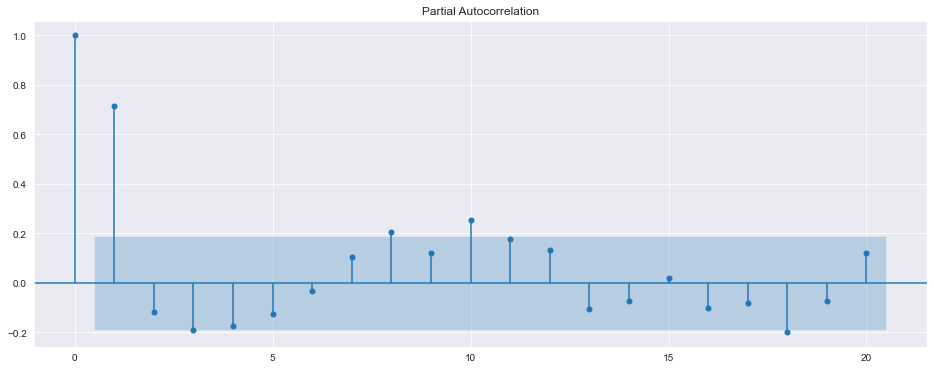

In [23]:
plot_acf(df['prcfat'], lags=20)
plot_pacf(df['prcfat'], lags=20)

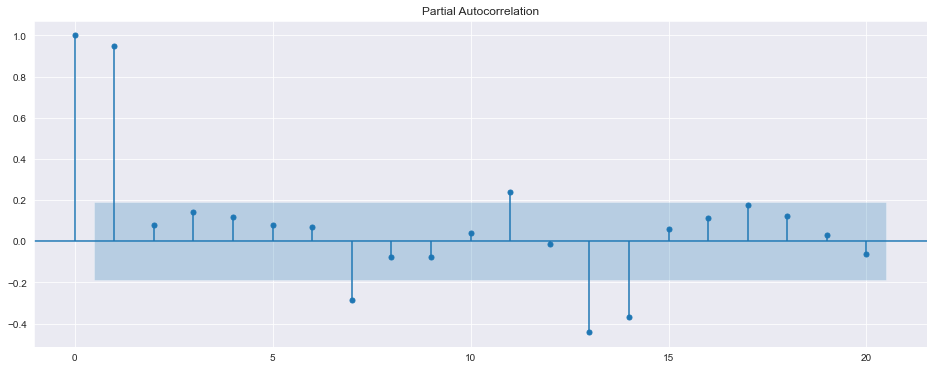

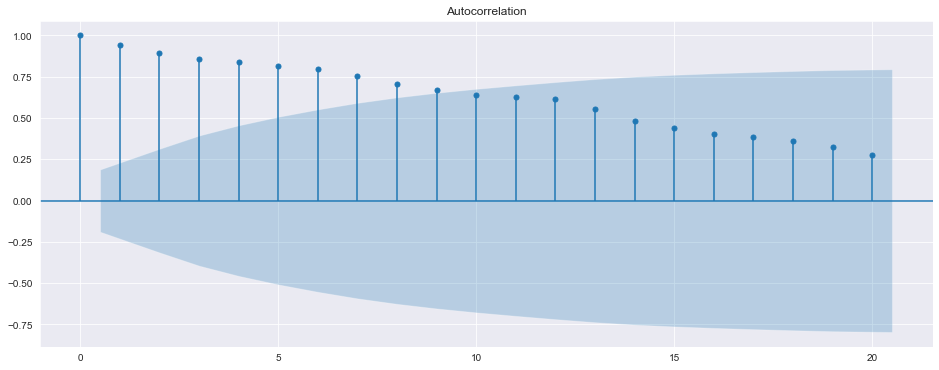

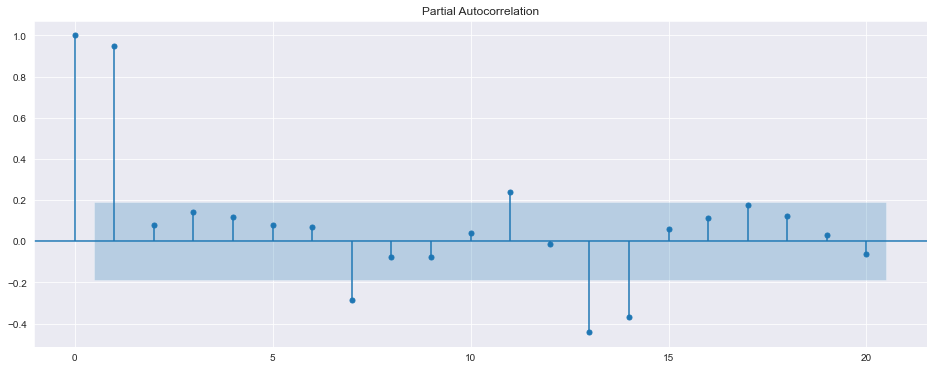

In [24]:
plot_acf(df['unem'], lags=20)
plot_pacf(df['unem'], lags=20)

## adf test

In [25]:
X = df['prcfat'].values
result1=adfuller(X,regression='ct',autolag='BIC',regresults=True,store=True)
out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'
print(out.format(result1[0], result1[1], result1[2]))

 ADF statistic: -4.545, 
 p-value: 0.001, 
 critical value: {'1%': -4.045970933273362, '5%': -3.452348053635668, '10%': -3.1515755794286404}


In [26]:
X = df['unem'].values
result1=adfuller(X,regression='ct',autolag='BIC',regresults=True,store=True)
out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'
print(out.format(result1[0], result1[1], result1[2]))

 ADF statistic: -2.952, 
 p-value: 0.146, 
 critical value: {'1%': -4.045970933273362, '5%': -3.452348053635668, '10%': -3.1515755794286404}


# (h)

In [27]:
df['prcfat_D1'] = df['prcfat'].diff()
df['unem_D1']   = df['unem'].diff()

<AxesSubplot:xlabel='time'>

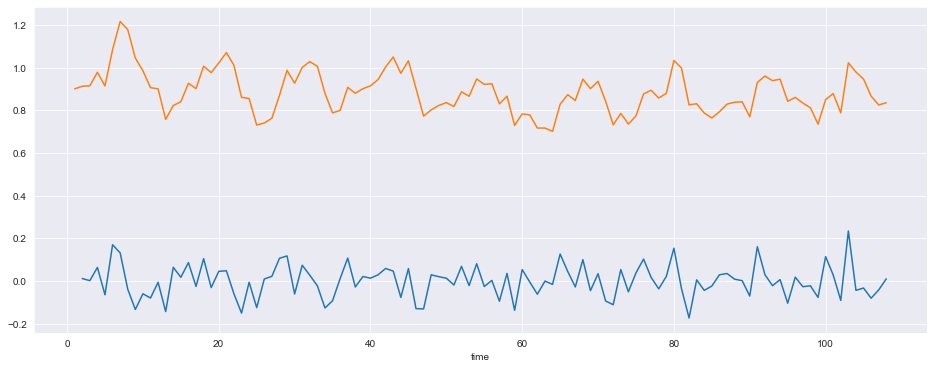

In [28]:
df['prcfat_D1'].plot()
df['prcfat'].plot()

<AxesSubplot:xlabel='time'>

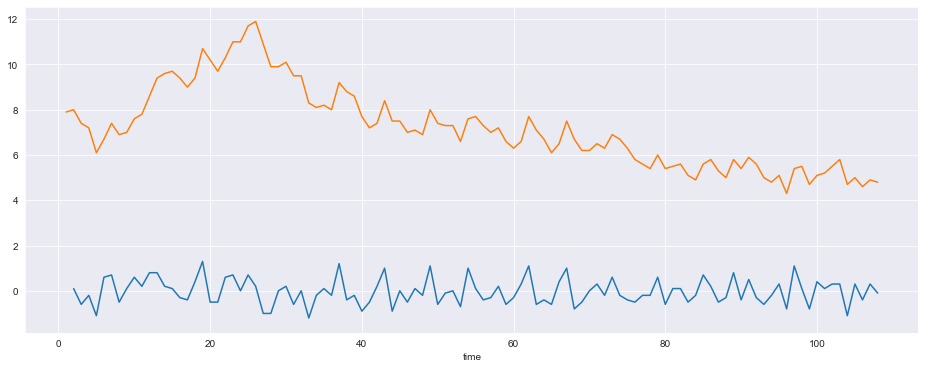

In [29]:
df['unem_D1'].plot()
df['unem'].plot()

In [30]:
X_h   = df[['const', 't', 'feb', 'mar', 'apr', 'may', 'jun', 
            'jul', 'aug','sep', 'oct', 'nov', 'dec',
            'wkends', 'unem_D1', 'spdlaw', 'beltlaw']]
Y_h   = df[['prcfat_D1']]
M_OLS = sm.OLS(Y_h, X_h, missing='drop')

OLS_result = M_OLS.fit()
print(OLS_result.summary())

                            OLS Regression Results                            
Dep. Variable:              prcfat_D1   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     2.945
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           0.000617
Time:                        12:42:01   Log-Likelihood:                 146.27
No. Observations:                 107   AIC:                            -258.5
Df Residuals:                      90   BIC:                            -213.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1269      0.105     -1.210      0.2

In [31]:
!rm -rf W6_Python.html W6_Python.pdf
!jupyter nbconvert --to html W6_Python.ipynb
!jupyter nbconvert --to pdf  W6_Python.ipynb

[NbConvertApp] Converting notebook W6_Python.ipynb to html
[NbConvertApp] Writing 954980 bytes to W6_Python.html
[NbConvertApp] Converting notebook W6_Python.ipynb to pdf
[NbConvertApp] Support files will be in W6_Python_files/
[NbConvertApp] Making directory ./W6_Python_files
[NbConvertApp] Making directory ./W6_Python_files
[NbConvertApp] Making directory ./W6_Python_files
[NbConvertApp] Making directory ./W6_Python_files
[NbConvertApp] Making directory ./W6_Python_files
[NbConvertApp] Making directory ./W6_Python_files
[NbConvertApp] Making directory ./W6_Python_files
[NbConvertApp] Making directory ./W6_Python_files
[NbConvertApp] Making directory ./W6_Python_files
[NbConvertApp] Making directory ./W6_Python_files
[NbConvertApp] Making directory ./W6_Python_files
[NbConvertApp] Writing 73545 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbC